# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
d\left[Q(w)\right] = d\left[\dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)\right] = \dfrac{1}{\ell}d\left[\left( y - Xw \right)^T \left( y - Xw \right)\right] = \dfrac{1}{\ell}\Bigg(d\left[\left( y - Xw \right)^T \right]\left( y - Xw \right) + \left( y - Xw \right)^T d \left[\left( y - Xw \right) \right]\Bigg) =
$$

$$
= \dfrac{1}{\ell}\Bigg(d\left[\left(- Xw \right)^T \right]\left( y - Xw \right) - \left( y - Xw \right)^T X dw\Bigg) = \dfrac{1}{\ell}\Bigg(-dw^T X^T\left( y - Xw \right) - \left( y - Xw \right)^T X dw\Bigg) = \left[ -dw^T X^T\left( y - Xw \right) \text{ - is a scalar}\right] =
$$

$$
= \dfrac{2}{\ell} X^T\left(Xw  - y\right) dw
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [563]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [564]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [565]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [566]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(descent_name)
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

full
stochastic
momentum
adam


In [567]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124819648/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124819688/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124819712/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124819739/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124456510/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [568]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [569]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [570]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

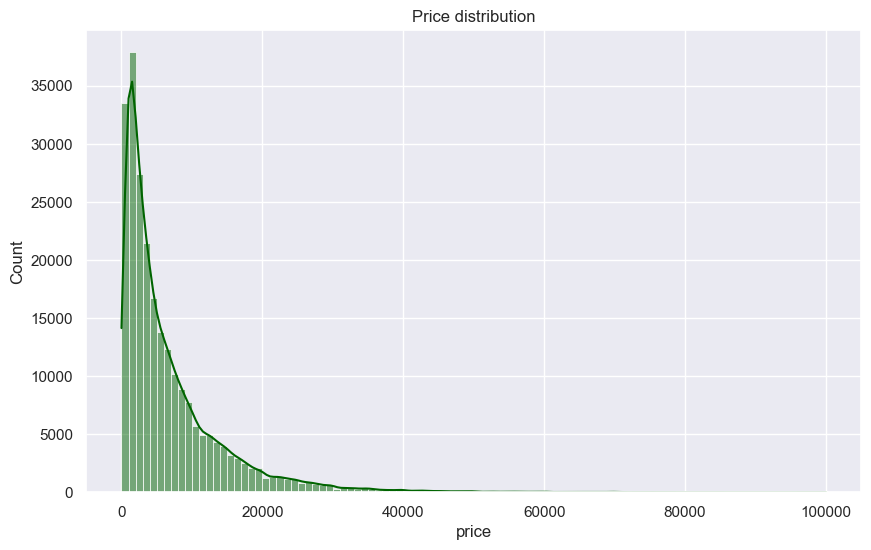

In [571]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=100, color='darkgreen')
plt.title('Price distribution')
plt.show()

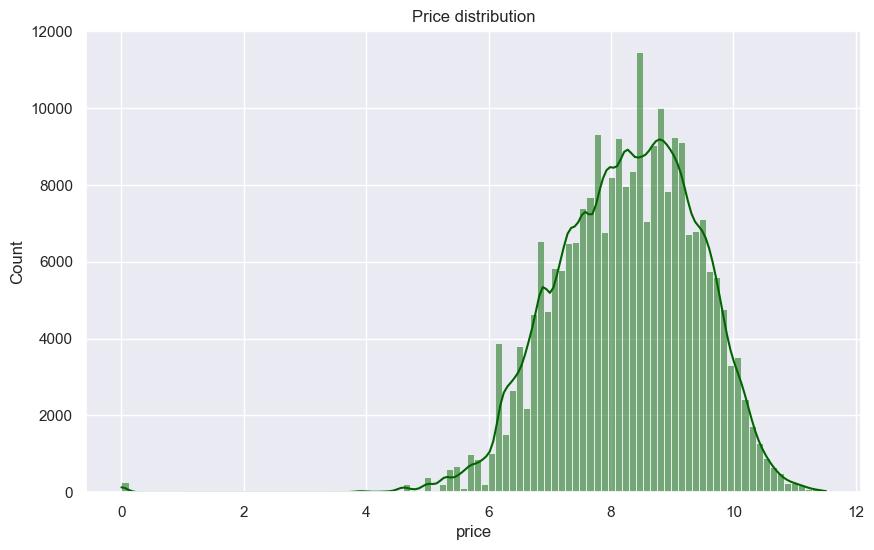

In [572]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['price']), kde=True, bins=100, color='darkgreen')
plt.title('Price distribution')
plt.show()

Видно, что лучше взять логарифмированный таргет (и удалить выбросы в левом хвосте)

In [573]:
data['log_price'] = np.log(data['price'])

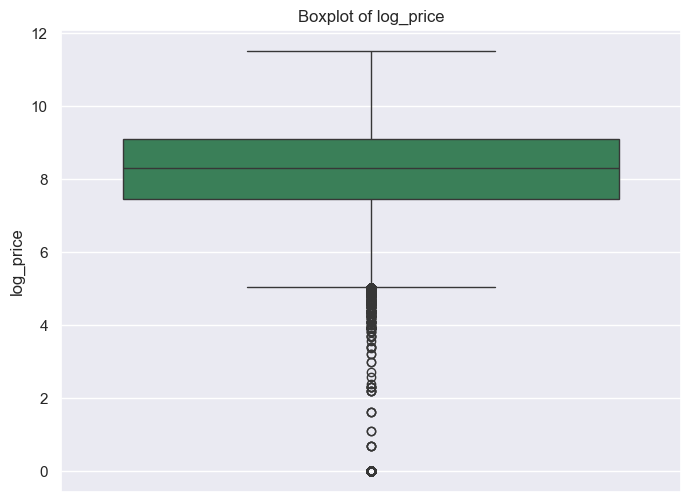

In [574]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['log_price'], color='seagreen')
plt.title('Boxplot of log_price')
plt.show()

In [575]:
data = data[data['log_price']>5] #убираем выбросы

<Axes: >

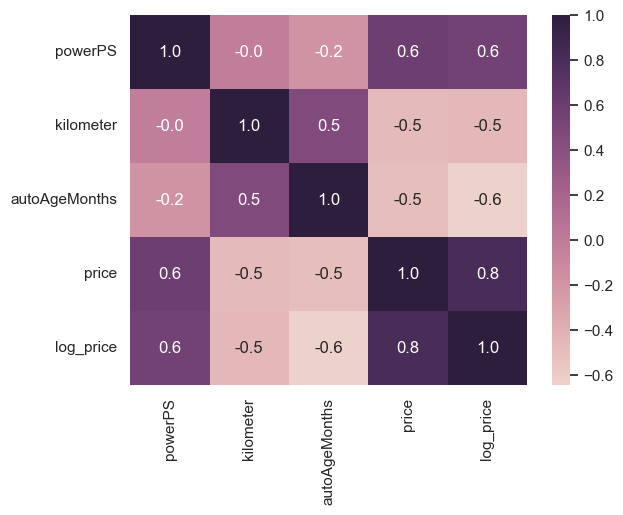

In [576]:
sns.heatmap(data.select_dtypes(exclude=['object']).corr(), annot=True, fmt=".1f", cmap=sns.cubehelix_palette(as_cmap=True))

In [577]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

In [578]:
print(f'Unique elements in brand: {data['brand'].nunique()}')
print(f'Unique elements in model: {data['model'].nunique()}')

Unique elements in brand: 38
Unique elements in model: 249


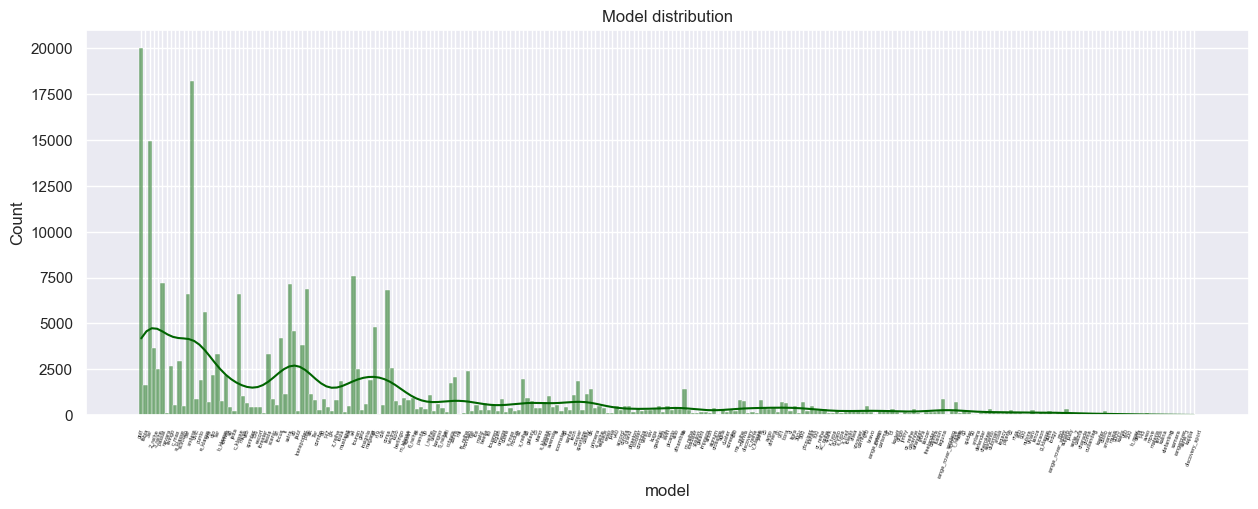

In [579]:
plt.figure(figsize=(15, 5))
sns.histplot(data['model'], kde=True, bins=100, color='darkgreen')
plt.title('Model distribution')
plt.xticks(rotation=70, fontsize=4)
plt.show()

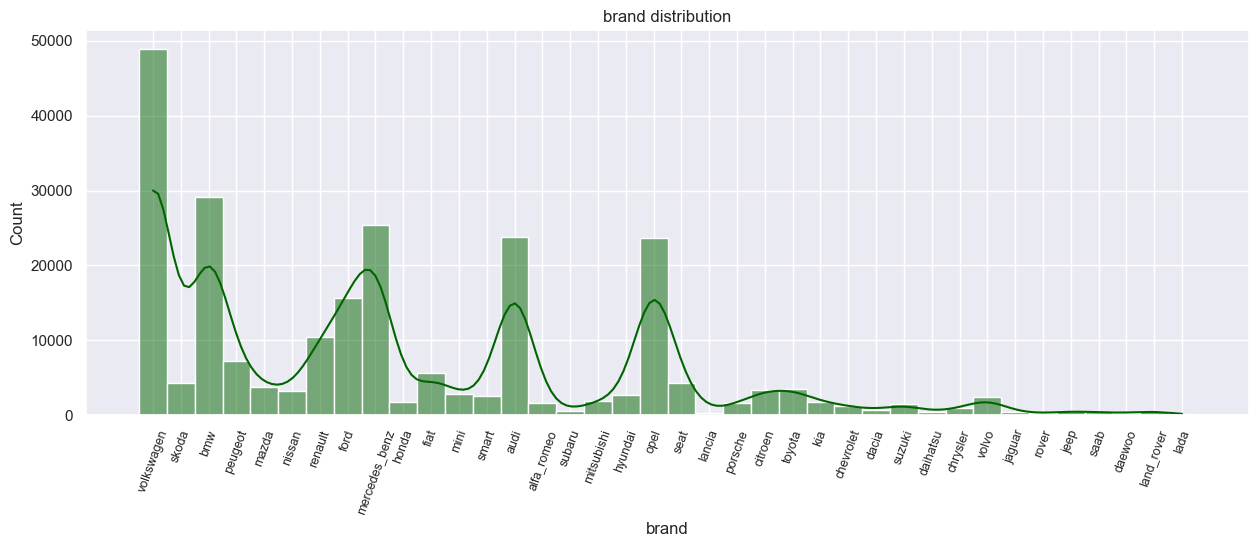

In [580]:
plt.figure(figsize=(15, 5))
sns.histplot(data['brand'], kde=True, bins=100, color='darkgreen')
plt.title('brand distribution')
plt.xticks(rotation=70, fontsize=9)
plt.show()

есть ощущение, что использование столбца model приведет к переобучению за счет слишком большого увеличения количества признаков, и большинство из моделей соответствуют слишком небольшому числу объектов в выборке (короче, я бы удалила)

бренд полезно оставить 

In [581]:
data.drop(columns=['price'], inplace=True)

In [582]:
data.drop(columns=['model'], inplace=True)

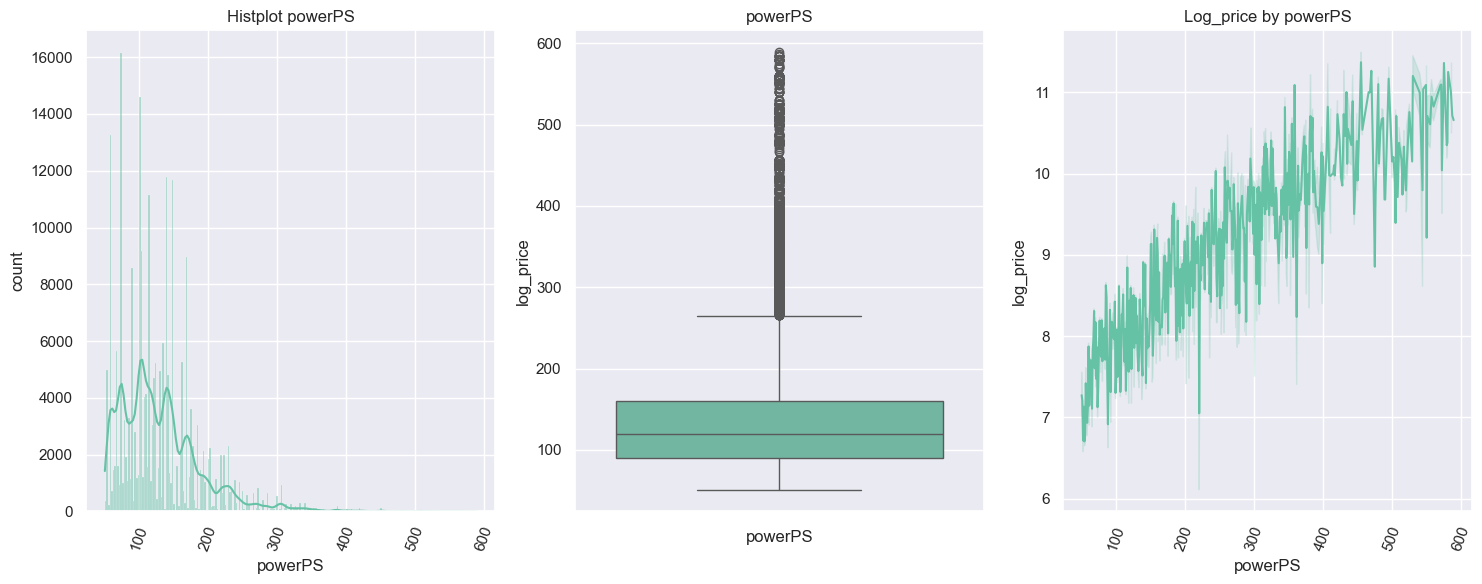

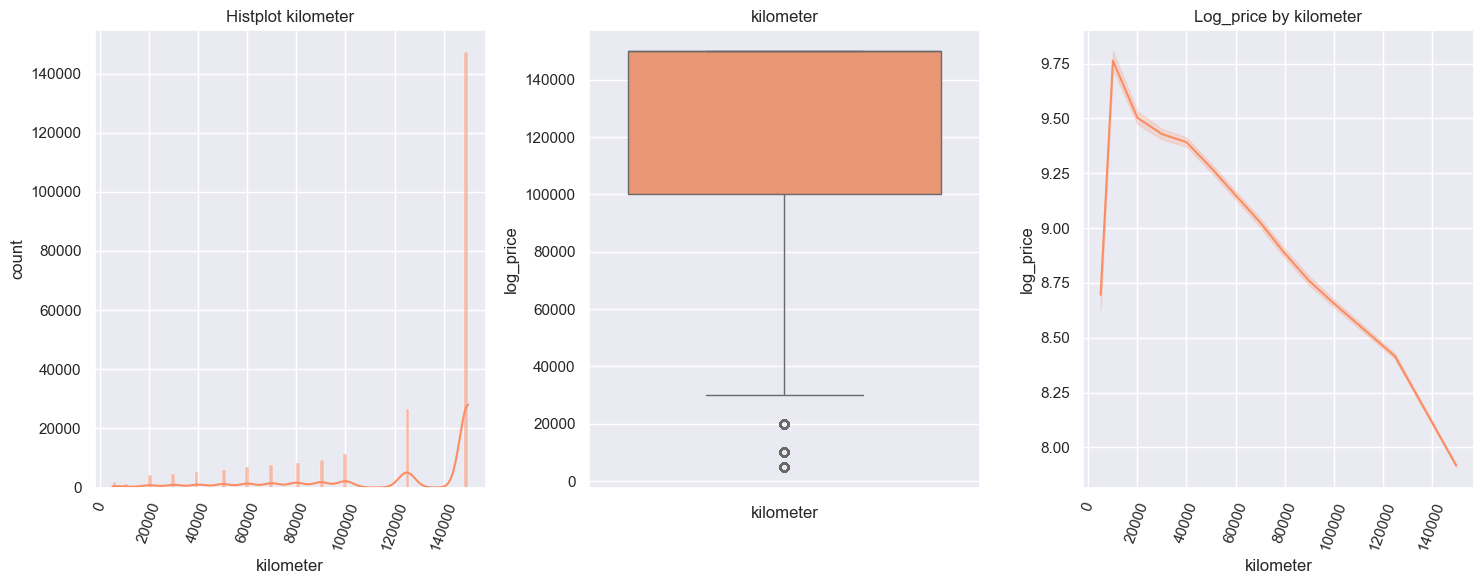

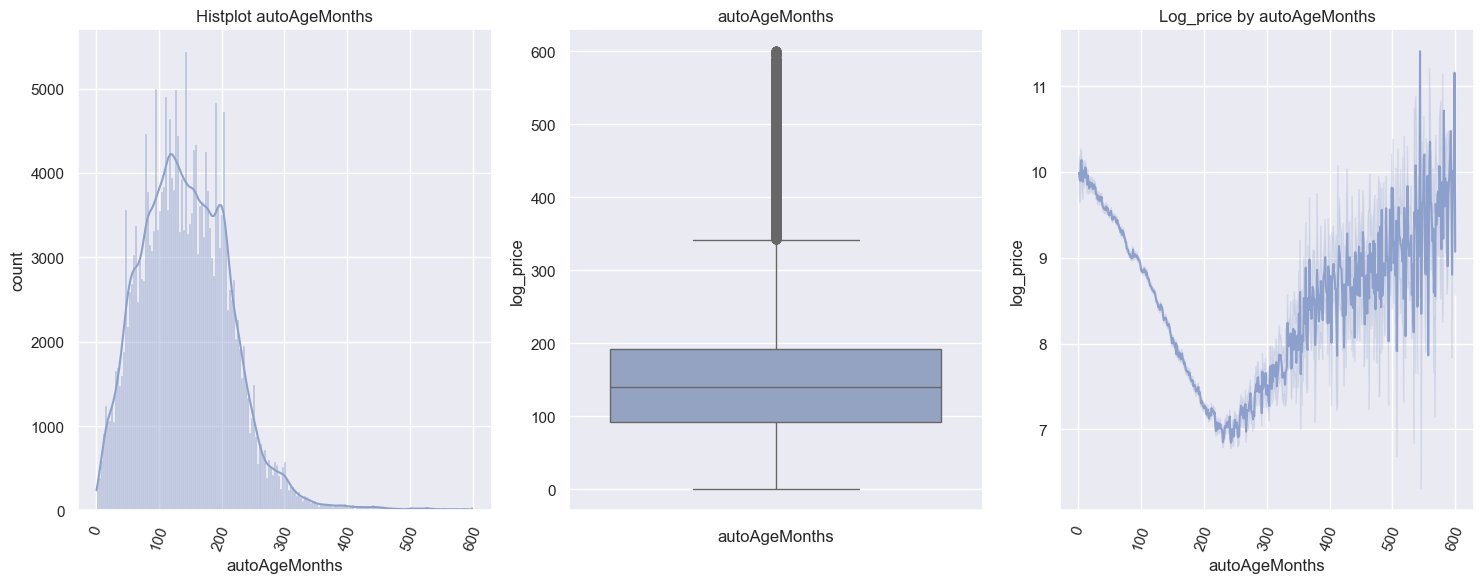

In [583]:
pal = sns.color_palette("Set2")

def for_feature(feature, data, color):
  fig, axes = plt.subplots(1, 3, figsize=(15, 6))
  sns.histplot(data[feature], kde=True, ax=axes[0], color=color)
  axes[0].set_title(f'Histplot {feature}')
  axes[0].set_xlabel(feature)
  axes[0].tick_params(axis='x', labelrotation=70)
  axes[0].set_ylabel('count')

  if feature in data.select_dtypes(exclude='object'):
    #sns.lineplot(data=data.groupby(data[feature])[['log_price']].count(), ax=axes[1], color=color)
    sns.boxplot(data[feature], ax=axes[1], color=color)
    axes[1].set_title(f'{feature}')
    axes[1].set_xlabel(feature)
    axes[1].tick_params(axis='x', labelrotation=70)
    axes[1].set_ylabel('log_price')
  else:
  #sns.boxplot(data[feature], ax=axes[1], color=color)
    sns.boxplot(data=data, x="log_price", y=feature, ax=axes[1], color=color)
    axes[1].set_title(f'{feature}')
    axes[1].set_xlabel('log_price')
    axes[1].set_ylabel(feature)

  #sns.lineplot(data=data.groupby(data[feature])[['log_price']].count(), ax=axes[2])
  #markers=True
  sns.lineplot(y=data['log_price'], x=data[feature], ax=axes[2], color=color)
  axes[2].set_title(f'Log_price by {feature}')
  axes[2].set_xlabel(feature)
  axes[2].set_ylabel('log_price')
  plt.xticks(rotation=70)
  plt.tight_layout()
  plt.show()

i = 0
for feature in data.select_dtypes(include='int64').columns:
  for_feature(feature, data, pal[i])
  i += 1


In [584]:
print(data[data['powerPS'] > 290].shape[0])

5789


In [585]:
data = data[data['powerPS']<290] #удаляем выбросы
data.loc[:, 'is_vintage'] = data['autoAgeMonths'].apply(lambda x: 1 if x >250 else 0)

In [586]:
bins = [0] + list(range(10000, 170000, 30000)) 
labels = [i for i in range(6)] 
data['km_group'] = pd.cut(data['kilometer'], bins=bins, labels=labels, include_lowest=True)
data['km_group']

0         5
1         3
2         5
3         5
4         5
         ..
241184    5
241185    5
241186    5
241187    4
241188    5
Name: km_group, Length: 234549, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

Все признаки здесь полезные, но необходимо убрать выбросы для признака powerPS (их получается не так много). В случае с пробегом можно сгруппировать значения с шагом по 30000 (логично только взять первый интервал до 10000 как возрастающий). С возрастом авомобиля по месяцам получается, что все значения, которые больше чем примерно 20 лет - выбросы, однако можно заметить, что это и есть порог для становления машины винтажной - цена начинает расти. Так что можно добавить признак is_vintage, например. 

Так как признаки powerPS и возраст авто в месяцах числовые, для них применим standartScaler, а новое разделение по пробегу - категориальная переменная, к ней - ohe

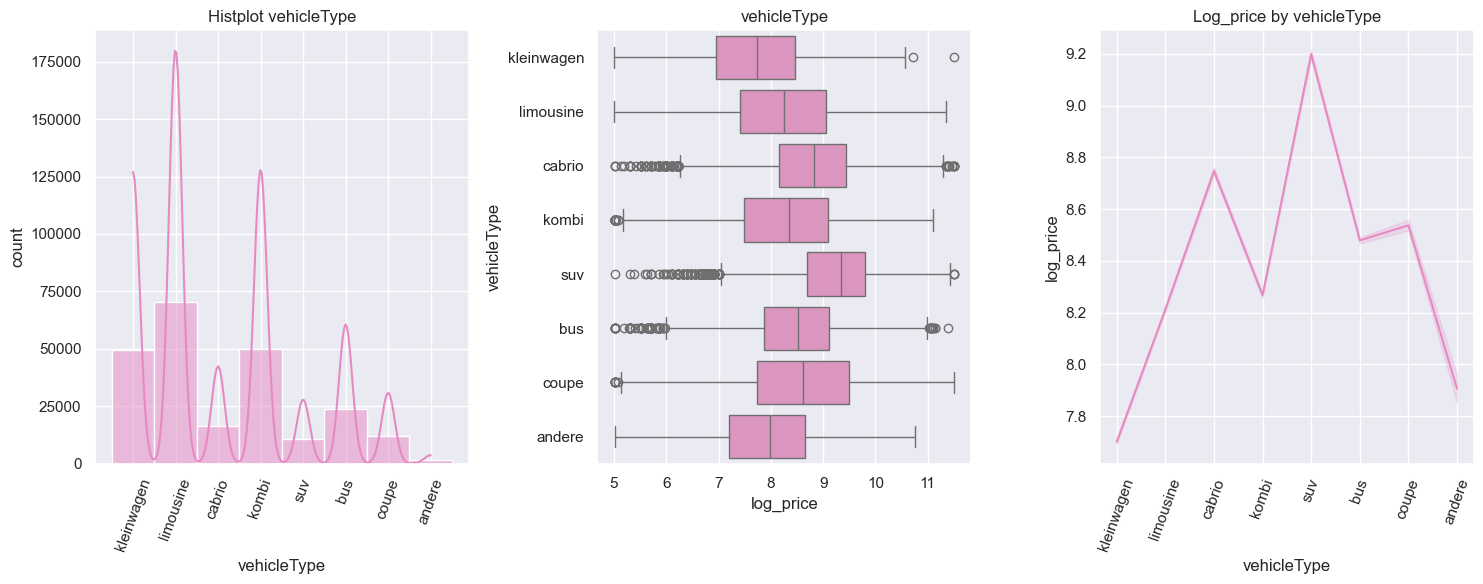

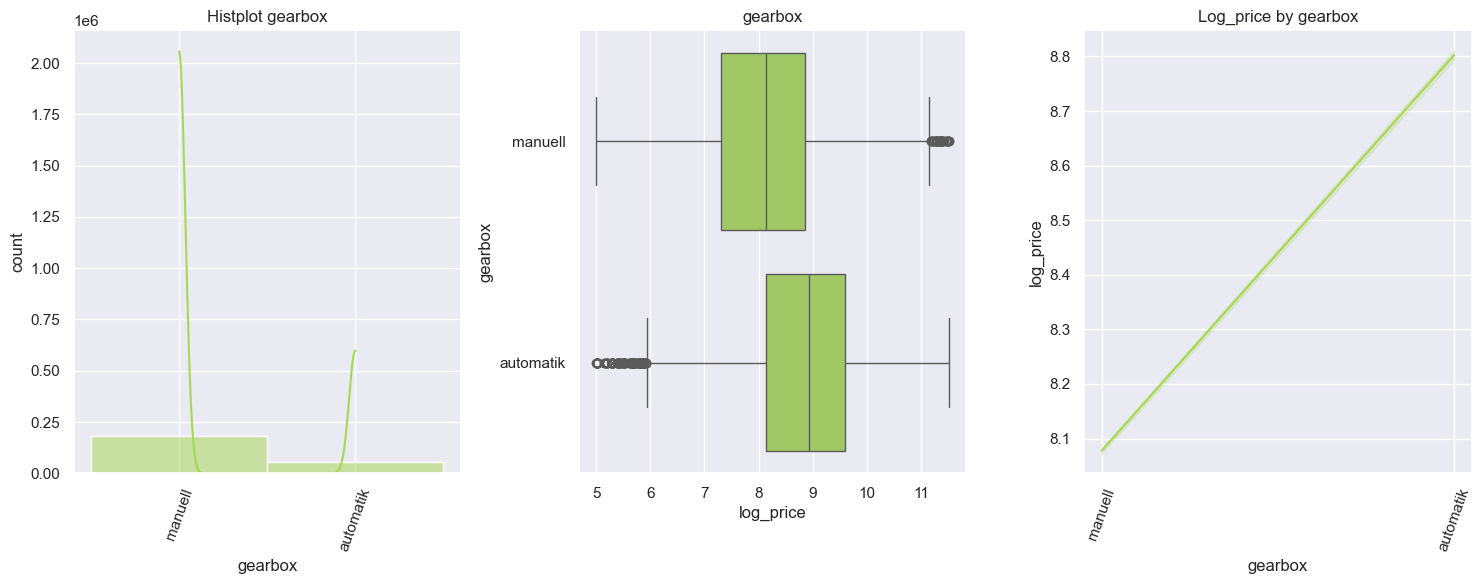

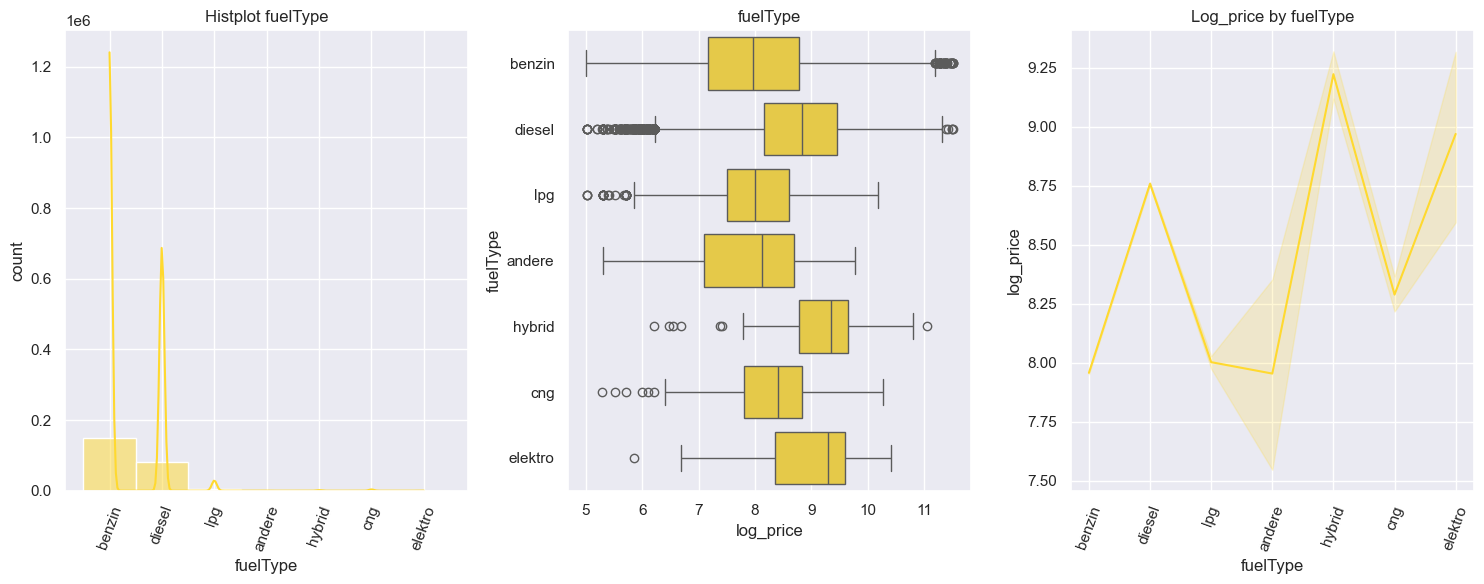

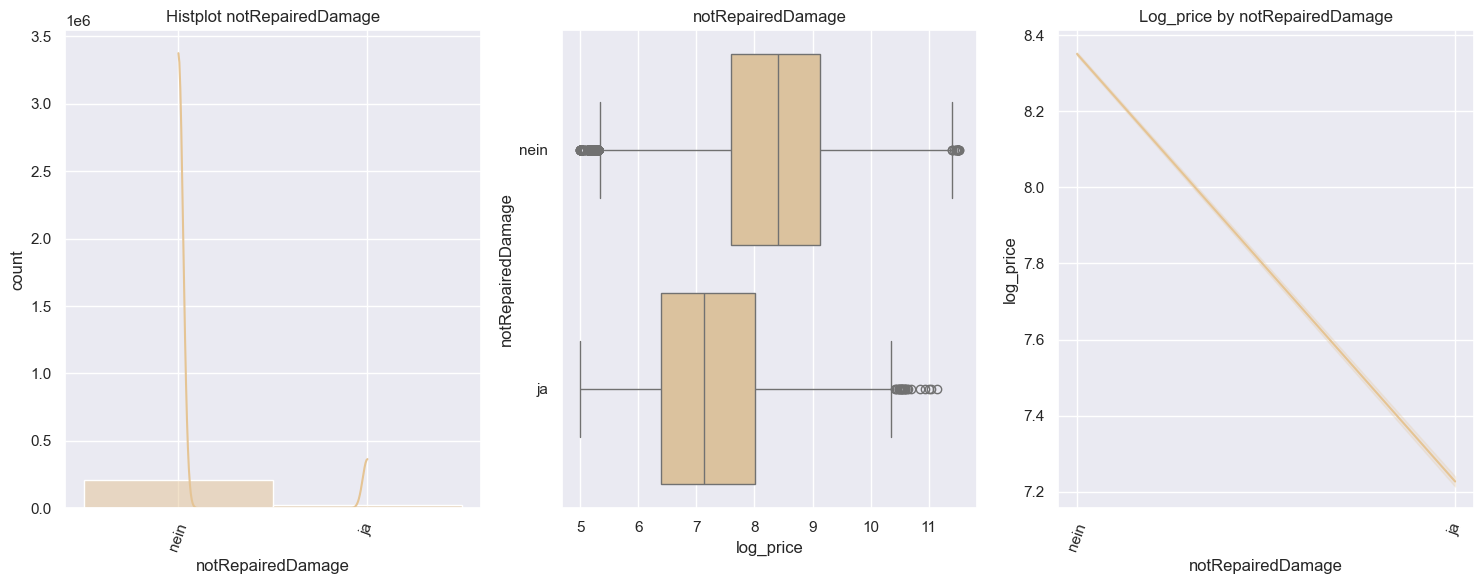

In [587]:
for feature in ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']:
  for_feature(feature, data, pal[i])
  i += 1

Здесь все признаки тоже выглядят полезными, и очевидно являются категориальными, а значит для них используем one hot

In [588]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'km_group', 'is_vintage']
numeric = ['powerPS', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [589]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [590]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [591]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42) 

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [592]:
from sklearn.metrics import mean_squared_error, r2_score

In [593]:
lambda_grid = np.logspace(-6, 0.5, 20)

result = {}

stats = {}

methods =  ['full', 'stochastic', 'momentum', 'adam']

for method in methods:
    lambda_best = 0
    mse_best = np.inf
    
    for lambdas in lambda_grid:
        descent_config = { 'descent_name': method,
                           'kwargs': {'dimension': X_train.shape[1], 'lambda_' : lambdas}}
        obj = LinearRegression(descent_config)
        obj.fit(X_train, y_train)
        mse = obj.calc_loss(X_val, y_val)
        if mse < mse_best:
            mse_best = mse
            lambda_best = lambdas
            model_best = obj

    pred_train = model_best.predict(X_train)
    pred_test = model_best.predict(X_test)
    mse_train = mean_squared_error(pred_train, y_train)
    r2_train = r2_score(pred_train, y_train)
    stats[method] = {
        'method' : method,
        'lambda_' : lambda_best,
        'mse_train' : mse_train,
        'r2_train' : r2_train,
        'number_of_iterations' : len(model_best.loss_history),
        'history' : model_best.loss_history
    }
    print(method)
    print(f'Best lambda: {lambda_best}')
    print(f'MSE train: {mse_train}')
    print(f'MSE test: {mean_squared_error(pred_test, y_test)}')
    print(f'R2 train: {r2_train}')
    print(f'R2 test: {r2_score(pred_test, y_test)}')
    print()


full
Best lambda: 1.438449888287663
MSE train: 0.2853735691056699
MSE test: 0.2825191808675449
R2 train: 0.6895911689306702
R2 test: 0.6944030768634477

stochastic
Best lambda: 0.2976351441631319
MSE train: 0.4063804476875686
MSE test: 0.4003912799734659
R2 train: 0.5500444840302325
R2 test: 0.5590447260313767

momentum
Best lambda: 0.6543189129712969
MSE train: 0.2721630848902976
MSE test: 0.26997305681579514
R2 train: 0.7020392431629523
R2 test: 0.7067181958573711

adam
Best lambda: 0.6543189129712969
MSE train: 0.2641486568585894
MSE test: 0.26082526738934064
R2 train: 0.7148984314448208
R2 test: 0.7198851902963602



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [594]:
data_gr = pd.DataFrame.from_dict(stats, orient='index')
data_gr

,method,lambda_,mse_train,r2_train,number_of_iterations,history
full,full,1.438450,0.285374,0.689591,106,"[22.278026849989608, 1326.2149233323469, 59569..."
stochastic,stochastic,0.297635,0.406380,0.550044,94,"[18.514077166379447, 17.655957155691286, 4.926..."
momentum,momentum,0.654319,0.272163,0.702039,108,"[21.054295764128433, 210.74996430374466, 377.3..."
adam,adam,0.654319,0.264149,0.714898,82,"[23.4837563570966, 2.1593289752525386, 3.09650..."


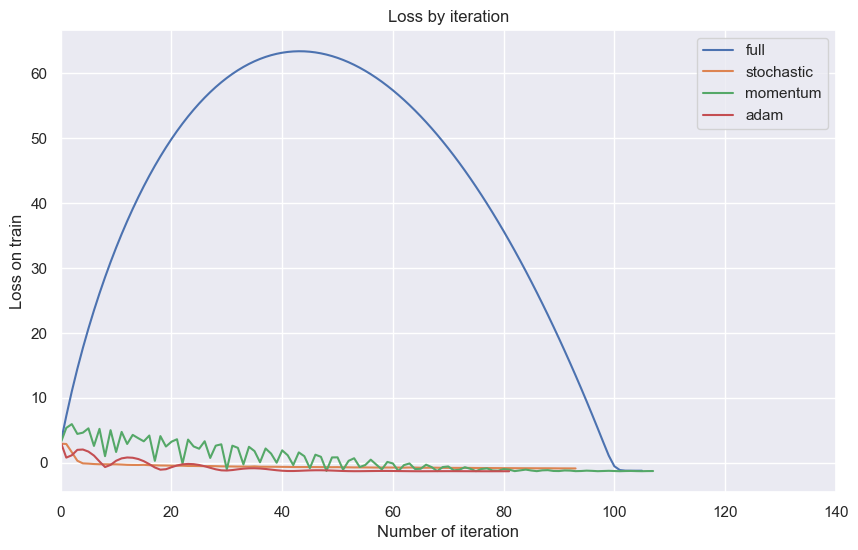

In [595]:
plt.figure(figsize=(10, 6))

for i in range(4):
  x = [i for i in range(data_gr.iloc[i]['number_of_iterations'])]
  sns.lineplot(x = x, y = np.log(data_gr.iloc[i]['history']), label=data_gr.iloc[i]['method']) #строим логарифм чтобы было что то видно 

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.xlim(0, 140)
plt.legend()
plt.grid(True)
plt.show()

Уберем большую ошибку для full, чтобы посмотреть на изменение в других методах поподробнее

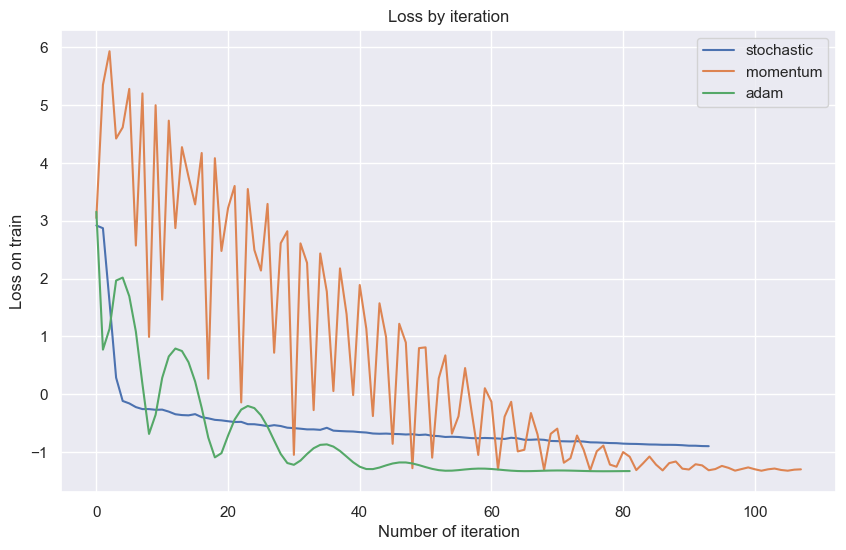

In [596]:
#для логарифма

plt.figure(figsize=(10, 6))

for i in range(1, 4):
  x = [i for i in range(data_gr.iloc[i]['number_of_iterations'])]
  sns.lineplot(x = x, y = np.log(data_gr.iloc[i]['history']), label=data_gr.iloc[i]['method'])

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.legend()
plt.grid(True)
plt.show()

Наилучшее качество по r^2 и ошибка достигаются в методах adam и momentum. Наихудшие про стохастическом градиентом спуске. При этом все они (что видно и по графику и по таблице) сходятся за число итераций больше 80 и до 110

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [597]:
from timeit import default_timer as timer
import time

batch_sizes = np.arange(5, 500, 10)

time_iter = {}

for batch in batch_sizes:
    mean_time = []
    mean_iter = []
    for k in range(10):
        descent_config = { 'descent_name': 'stochastic',
                           'kwargs': {'dimension': X_train.shape[1], 'lambda_' : data_gr.iloc[1]['lambda_'], 'batch_size' : batch}}
        obj = LinearRegression(descent_config)
        start = time.perf_counter()
        obj.fit(X_train, y_train)
        end = time.perf_counter()
        mean_time.append(end - start)
        mean_iter.append(len(obj.loss_history))

    time_iter[batch] = {
        'batch' : batch,
        'mean_time' : np.mean(mean_time),
        'mean_iter' : np.mean(mean_iter),
    }
    


In [598]:
data_st = pd.DataFrame.from_dict(time_iter, orient='index')
data_st

,batch,mean_time,mean_iter
5,5,0.209980,168.5
15,15,0.169091,137.7
25,25,0.155137,125.0
35,35,0.136956,110.8
45,45,0.136073,112.6
55,55,0.110594,94.9
65,65,0.110848,94.6
75,75,0.096180,82.7
85,85,0.096375,81.8
95,95,0.088520,76.0


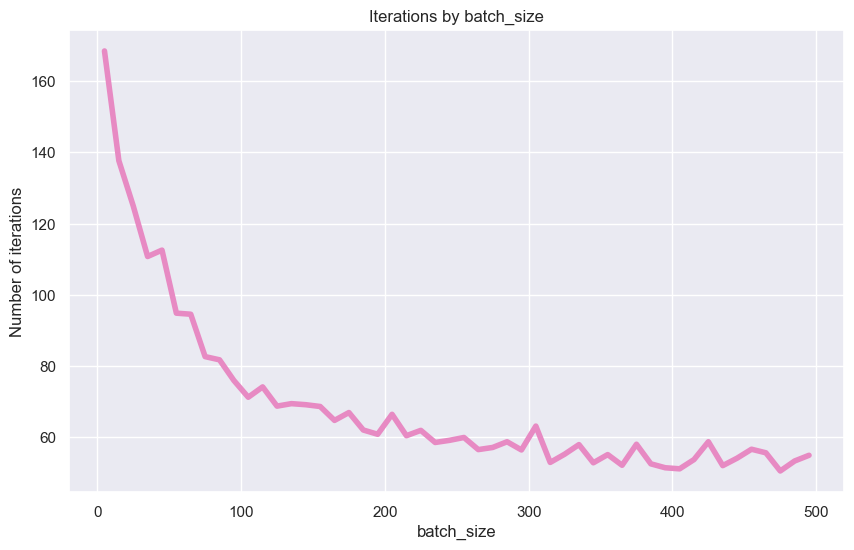

In [599]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = data_st['batch'], y = data_st['mean_iter'], color=pal[3], linewidth = 4) 
plt.xlabel('batch_size')
plt.ylabel('Number of iterations')
plt.title('Iterations by batch_size')
plt.grid(True)
plt.show()

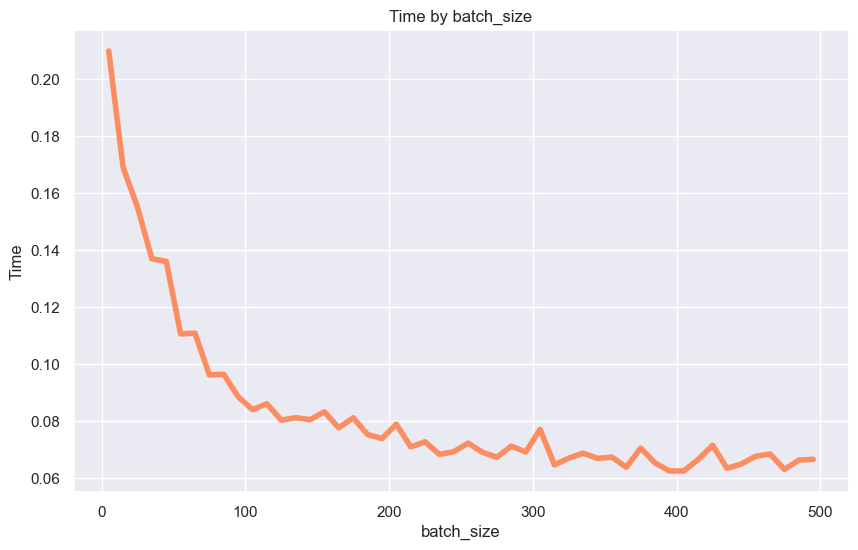

In [600]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = data_st['batch'], y = data_st['mean_time'], color=pal[1], linewidth = 4) 
plt.xlabel('batch_size')
plt.ylabel('Time')
plt.title('Time by batch_size')
plt.grid(True)
plt.show()

Чем меньше размер батча, тем дольше обучается стохастический градиентный спуск (и по времени, и по числу итераций до сходимости). Где-то начиная со значений батча равных 325 и время, и число итераций выходит на около постоянный уровень. В целом, батч должен быть не слишком маленьким - однако неясно про слишком большие значения, так как тут мы не смотрели на ошибку

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124819788/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [601]:
lambda_grid = np.logspace(-6, 0.5, 20)

mu_grid = np.logspace(-4, 1, 10)

result_both  = {}

stats = {}

methods =  ['full', 'stochastic', 'momentum', 'adam']

for method in methods:
    result_both[method] = {}
    for lambdas in lambda_grid:
        i = 0
        result_both[method][lambdas] = {}
        for mu in mu_grid:
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambdas, 'mu': mu}
            }
            obj = LinearRegression(descent_config)
            obj.fit(X_train, y_train)
            mse = obj.calc_loss(X_val, y_val)
            result_both[method][lambdas][mu] = {
                'mse_val': mse,
                'model': obj
            }

for method in methods:
    best_lambda = 0
    best_mu = 0
    best_mse = np.inf
    for lambdas in result_both[method]:
        for mu in result_both[method][lambdas]:
            mse = result_both[method][lambdas][mu]['mse_val']
            if mse < best_mse:
                best_mse = mse
                best_lambda = lambdas
                best_mu = mu
                best_model = result_both[method][lambdas][mu]['model']

   
    pred_train = best_model.predict(X_train)
    pred_test = best_model.predict(X_test)
    mse_train = mean_squared_error(pred_train, y_train)
    r2_train = r2_score(pred_train, y_train)
    mse_test = mean_squared_error(pred_test, y_test)
    r2_test = r2_score(pred_test, y_test)

    result_both[method]['best'] = {
        'lambdas': best_lambda,
        'mu': best_mu,
        'mse_train': mse_train,
        'r2_train': r2_train,
        'mse_test': mse_test,
        'r2_test': r2_test,
        'number_of_iterations': len(best_model.loss_history),
        'history': best_model.loss_history
    }

    print(method)
    print(f'Best lambda: {best_lambda}')
    print(f'Best mu: {best_mu}')
    print(f'MSE train: {mse_train}')
    print(f'MSE test: {mse_test}')
    print(f'R2 train: {r2_train}')
    print(f'R2 test: {r2_test}')
    print()


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


full
Best lambda: 1.438449888287663
Best mu: 0.001291549665014884
MSE train: 0.2837030187176798
MSE test: 0.2806943171385239
R2 train: 0.686435440169183
R2 test: 0.6924039699855198

stochastic
Best lambda: 0.6543189129712969
Best mu: 0.0001
MSE train: 0.3219677362932327
MSE test: 0.31996444744245484
R2 train: 0.6606596596110366
R2 test: 0.6656801173710647

momentum
Best lambda: 1.438449888287663
Best mu: 0.004641588833612782
MSE train: 0.26791055339894776
MSE test: 0.26459308505747625
R2 train: 0.7029914014295029
R2 test: 0.7085374749999912

adam
Best lambda: 0.2976351441631319
Best mu: 0.0001
MSE train: 0.2641749687472345
MSE test: 0.26145906942265557
R2 train: 0.7109236216139672
R2 test: 0.7157316177481721



Достаточно хорошо улучшилось качество и метрика для стохастического градиентного спуска, и немного для momentum. В целом, выросло число итераций, ну и немного изменились значения оптимальной лямбды

In [602]:
data_both = pd.DataFrame.from_dict(result_both, orient='index')

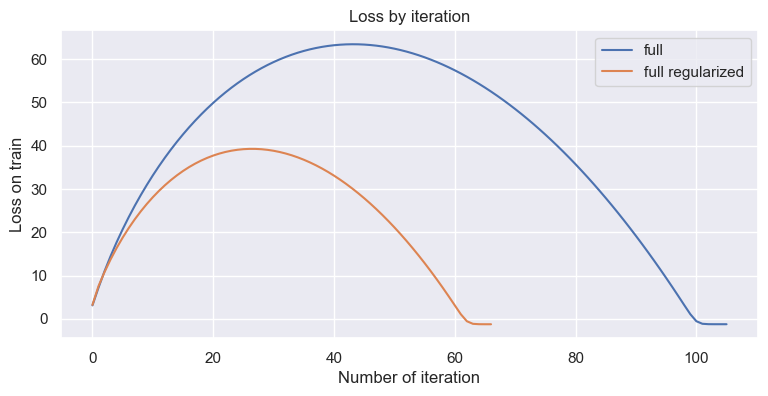

In [603]:
plt.figure(figsize=(9, 4))

sns.lineplot(x = [i for i in range(len(data_gr.iloc[0]['history']))], y = np.log(data_gr.iloc[0]['history']), label = 'full') 
sns.lineplot(x = [i for i in range(len(data_both.iloc[0]['best']['history']))], y = np.log(data_both.iloc[0]['best']['history']), label = 'full regularized')

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.legend()
plt.grid(True)
plt.show()

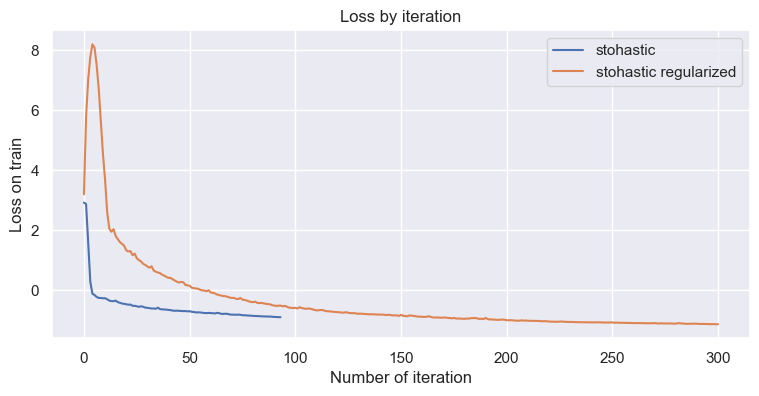

In [604]:
plt.figure(figsize=(9, 4))

sns.lineplot(x = [i for i in range(len(data_gr.iloc[1]['history']))], y = np.log(data_gr.iloc[1]['history']), label = 'stohastic') 
sns.lineplot(x = [i for i in range(len(data_both.iloc[1]['best']['history']))], y = np.log(data_both.iloc[1]['best']['history']), label = 'stohastic regularized')

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.legend()
plt.grid(True)
plt.show()

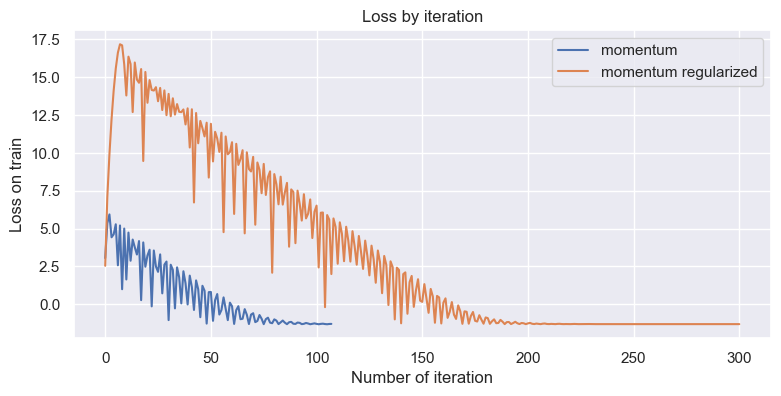

In [605]:
plt.figure(figsize=(9, 4))

sns.lineplot(x = [i for i in range(len(data_gr.iloc[2]['history']))], y = np.log(data_gr.iloc[2]['history']), label = 'momentum') 
sns.lineplot(x = [i for i in range(len(data_both.iloc[2]['best']['history']))], y = np.log(data_both.iloc[2]['best']['history']), label = 'momentum regularized')

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.legend()
plt.grid(True)
plt.show()

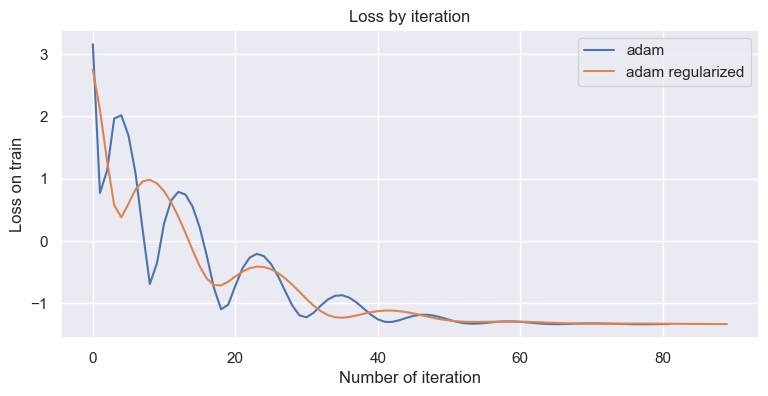

In [606]:
plt.figure(figsize=(9, 4))

sns.lineplot(x = [i for i in range(len(data_gr.iloc[3]['history']))], y = np.log(data_gr.iloc[3]['history']), label = 'adam') 
sns.lineplot(x = [i for i in range(len(data_both.iloc[3]['best']['history']))], y = np.log(data_both.iloc[3]['best']['history']), label = 'adam regularized')

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.legend()
plt.grid(True)
plt.show()

Регуляризация улучшает сходимость, в некоторых случаях получается уменьшает колебания (скачки) в ошибке за счет дополнительного штрафа на большие веса. 

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

$$
 \dfrac{\partial L(y, Xw)}{\partial w} = \dfrac{\partial \log\left(\cosh(Xw - y)\right)}{\partial w} = \dfrac{1}{\cosh(Xw - y)} \cdot \dfrac{\partial}{\partial w} \cosh(Xw - y) = \dfrac{\partial}{\partial w} (Xw - y)^T \cdot \dfrac{ \sinh(Xw - y)}{\cosh(Xw - y)} = X^T \tanh(Xw - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [607]:
from descents import LossFunction

In [608]:
lambda_grid = np.logspace(-6, 1, 20)

result = {}

stats = {}

methods =  ['full', 'stochastic', 'momentum', 'adam']

for method in methods:
    lambda_best = 0
    mse_best = np.inf
    
    for lambdas in lambda_grid:
        descent_config = { 'descent_name': method,
                           'kwargs': {'dimension': X_train.shape[1], 'loss_function': LossFunction.LogCosh ,'lambda_' : lambdas}}
        obj = LinearRegression(descent_config)
        obj.fit(X_train, y_train)
        mse = obj.calc_loss(X_val, y_val)
        if mse < mse_best:
            mse_best = mse
            lambda_best = lambdas
            model_best = obj

    pred_train = model_best.predict(X_train)
    pred_test = model_best.predict(X_test)
    mse_train = mean_squared_error(pred_train, y_train)
    r2_train = r2_score(pred_train, y_train)
    stats[method] = {
        'method' : method,
        'lambda_' : lambda_best,
        'mse_train' : mse_train,
        'r2_train' : r2_train,
        'number_of_iterations' : len(model_best.loss_history),
        'history' : model_best.loss_history
    }
    print(method)
    print(f'Best lambda: {lambda_best}')
    print(f'MSE train: {mse_train}')
    print(f'MSE test: {mean_squared_error(pred_test, y_test)}')
    print(f'R2 train: {r2_train}')
    print(f'R2 test: {r2_score(pred_test, y_test)}')
    print()


full
Best lambda: 4.281332398719387
MSE train: 0.30727372817620885
MSE test: 0.3025970623956295
R2 train: 0.6824849444570926
R2 test: 0.689531675514292

stochastic
Best lambda: 4.281332398719387
MSE train: 0.3032623293444591
MSE test: 0.2992407125246075
R2 train: 0.729165647665124
R2 test: 0.7339276191115973

momentum
Best lambda: 4.281332398719387
MSE train: 0.275026783406678
MSE test: 0.27106848368830994
R2 train: 0.7166650044427323
R2 test: 0.7219683045267051

adam
Best lambda: 4.281332398719387
MSE train: 0.27186300042626854
MSE test: 0.26736033911455853
R2 train: 0.7245133297292573
R2 test: 0.7298608080475499



Качество с такой функцией потерь выросло для всех методов (особенно на тестовой выборке). Еще, как видно по графику ниже, ошибка получается значительно ниже

In [609]:
data_log = pd.DataFrame.from_dict(stats, orient='index')
data_log

,method,lambda_,mse_train,r2_train,number_of_iterations,history
full,full,4.281332,0.307274,0.682485,99,"[3.132286926603236, 8.996625685067016, 1.26070..."
stochastic,stochastic,4.281332,0.303262,0.729166,301,"[3.02176375571049, 9.376593898282328, 1.341683..."
momentum,momentum,4.281332,0.275027,0.716665,124,"[3.9117498048090287, 8.547774162094663, 9.6546..."
adam,adam,4.281332,0.271863,0.724513,111,"[3.7192332365950374, 19.120219093057518, 18.03..."


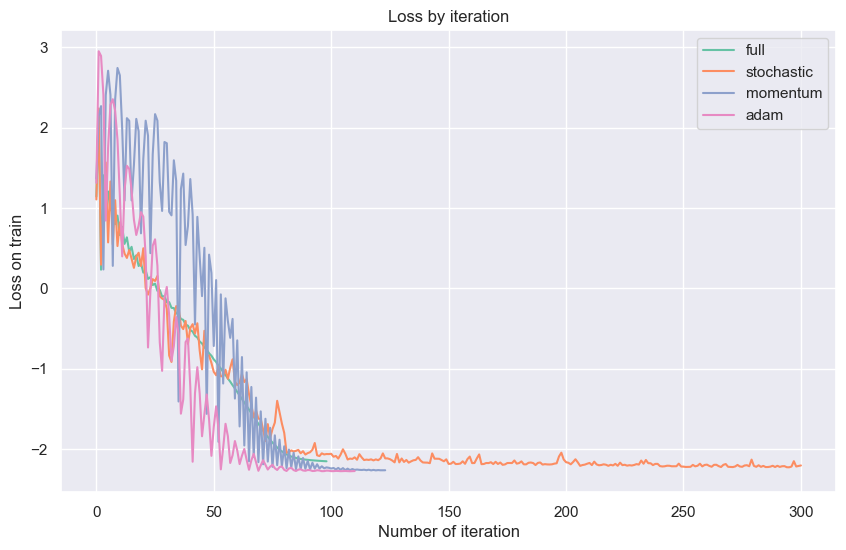

In [610]:
plt.figure(figsize=(10, 6))

for i in range(4):
  x = [i for i in range(data_log.iloc[i]['number_of_iterations'])]
  sns.lineplot(x = x, y = np.log(data_log.iloc[i]['history']), label=data_log.iloc[i]['method'], color=pal[i]) 

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.legend()
plt.grid(True)
plt.show()

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Готовить я, к сожалению, не очень умею, но есть семейный (почти секретный) рецепт картошки пюре (а секрет в нем в добавлении сливок и сметаны). Так что опыт был у меня такой 

Ингредиенты: 

Картошка - было около кг в наличии

Сливочное масло - примерно грамм 30

Молоко - примерно 150 г

Сливки - 125 г 

Сметана - одна ложка

Далее классически: чистим картошку, режем, кидаем в кастрюлю с водой (я еще добавляю немного соли), доводим до кипения, а потом варим (если картошка слишком молодая - как было у меня - получается минут 30). Затем специальной штукой мнем картошку со сливочным маслом, а затем сначала добавляем молоко, а потом сливки. Еще ложку сметаны для вкуса

Собственно, прилагается фото довольной подруги, которая была для этого события приглашена в гости

![picture](photo.jpeg)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

**Оно очевидно не работает, извиняюсь**

In [611]:
lambda_grid = np.logspace(-5, 5, 30)

result = {}

stats = {}

lambda_best = 0
mse_best = np.inf
    
for lambdas in lambda_grid:
    descent_config = { 'descent_name': 'adamax',
                    'kwargs': {'dimension': X_train.shape[1], 'loss_function': LossFunction.LogCosh ,'lambda_' : lambdas}}
    obj = LinearRegression(descent_config)
    obj.fit(X_train, y_train)
    if obj.calc_loss(X_train, y_train) < mse_best:
        mse_best = mse
        lambda_best = lambdas
        model_best = obj

pred_train = model_best.predict(X_train)
pred_test = model_best.predict(X_test)
mse_train = mean_squared_error(pred_train, y_train)
r2_train = r2_score(pred_train, y_train)
stats[method] = {
        'method' : method,
        'lambda_' : lambda_best,
        'mse_train' : mse_train,
        'r2_train' : r2_train,
        'number_of_iterations' : len(model_best.loss_history),
        'history' : model_best.loss_history
}
print(method)
print(f'Best lambda: {lambda_best}')
print(f'MSE train: {mse_train}')
print(f'MSE test: {mean_squared_error(pred_test, y_test)}')
print(f'R2 train: {r2_train}')
print(f'R2 test: {r2_score(pred_test, y_test)}')
print()


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in cosh
  result = getattr(ufunc, method)(*inputs, **kwargs)


adam
Best lambda: 1e-05
MSE train: 24.79987019746292
MSE test: 24.725516522137106
R2 train: -65.862678887685
R2 test: -64.62671994191241



### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

MAE: $$ MAE(y, a) = |a - y| \rightarrow Q(w) = \dfrac{1}{l} |Xw - y|$$
$$ \partial w Q(w) = \dfrac{1}{l} X^T \cdot sign (Xw - y)$$

Huber: $$ Huber_\delta(y, a) = \begin{cases} \dfrac{1}{2} (y-a)^2, |y - a| < \delta\\ \delta(|y - a| - \dfrac{\delta}{2}), else\end{cases} \Rightarrow Q(w) = \begin{cases} \dfrac{1}{2l} (y - Xw)^T (y - Xw), |y - Xw| < \delta  \\ \dfrac{\delta}{l}(|y - Xw| - \dfrac{\delta}{2}), else\end{cases}$$

$$
\partial w Q(w) = \begin{cases} \dfrac{1}{2l} d[(y - Xw)^T](y - Xw) + \dfrac{1}{2l}(y - Xw)^Td[(y - Xw)] , |y - Xw| < \delta  \\ \\ \dfrac{\delta}{l}X^T \cdot sign(Xw-y), else\end{cases}
$$

$$
\partial w Q(w) = \begin{cases} -\dfrac{1}{2l} X^T(y - Xw) - \dfrac{1}{2l}(y - Xw)^T X , |y - Xw| < \delta  \\ \\ \dfrac{\delta}{l}X^T \cdot sign(Xw-y), else\end{cases}
$$

$$
\partial w Q(w) = \begin{cases} -\dfrac{1}{l} X^T(y - Xw) , |y - Xw| < \delta  \\ \\ \dfrac{\delta}{l}X^T \cdot sign(Xw-y), else\end{cases}
$$


Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [612]:
lambda_grid = np.logspace(-6, 1, 20)

result = {}

stats = {}

methods =  ['full', 'stochastic', 'momentum', 'adam']

for method in methods:
    lambda_best = 0
    mse_best = np.inf
    
    for lambdas in lambda_grid:
        descent_config = { 'descent_name': method,
                           'kwargs': {'dimension': X_train.shape[1], 'loss_function': LossFunction.MAE ,'lambda_' : lambdas}}
        obj = LinearRegression(descent_config)
        obj.fit(X_train, y_train)
        mse = obj.calc_loss(X_val, y_val)
        if mse < mse_best:
            mse_best = mse
            lambda_best = lambdas
            model_best = obj

    pred_train = model_best.predict(X_train)
    pred_test = model_best.predict(X_test)
    mse_train = mean_squared_error(pred_train, y_train)
    r2_train = r2_score(pred_train, y_train)
    stats[method] = {
        'method' : method,
        'lambda_' : lambda_best,
        'mse_train' : mse_train,
        'r2_train' : r2_train,
        'number_of_iterations' : len(model_best.loss_history),
        'history' : model_best.loss_history
    }
    print(method)
    print(f'Best lambda: {lambda_best}')
    print(f'MSE train: {mse_train}')
    print(f'MSE test: {mean_squared_error(pred_test, y_test)}')
    print(f'R2 train: {r2_train}')
    print(f'R2 test: {r2_score(pred_test, y_test)}')
    print()




full
Best lambda: 1.8329807108324339
MSE train: 0.3158168887668427
MSE test: 0.30769157090526916
R2 train: 0.6835130864902688
R2 test: 0.6924588903248827

stochastic
Best lambda: 0.7847599703514607
MSE train: 0.3237199010337507
MSE test: 0.31620816441094207
R2 train: 0.6727412367387977
R2 test: 0.680163626152537

momentum
Best lambda: 1.8329807108324339
MSE train: 0.2913440634460948
MSE test: 0.2857636044493227
R2 train: 0.7014176051506967
R2 test: 0.7078692494009413

adam
Best lambda: 4.281332398719387
MSE train: 0.2877621373718782
MSE test: 0.28222998187331316
R2 train: 0.7070334821606343
R2 test: 0.7130048927747616



In [613]:
data_log = pd.DataFrame.from_dict(stats, orient='index')
data_log

,method,lambda_,mse_train,r2_train,number_of_iterations,history
full,full,1.832981,0.315817,0.683513,136,"[4.1254355637209335, 2.137908320434024, 1.6307..."
stochastic,stochastic,0.784760,0.323720,0.672741,301,"[3.4080068355978153, 1.2280266306707126, 1.027..."
momentum,momentum,1.832981,0.291344,0.701418,172,"[3.9819858280110965, 2.150249048550502, 3.5831..."
adam,adam,4.281332,0.287762,0.707033,118,"[4.590779677953358, 19.636184433827882, 18.604..."


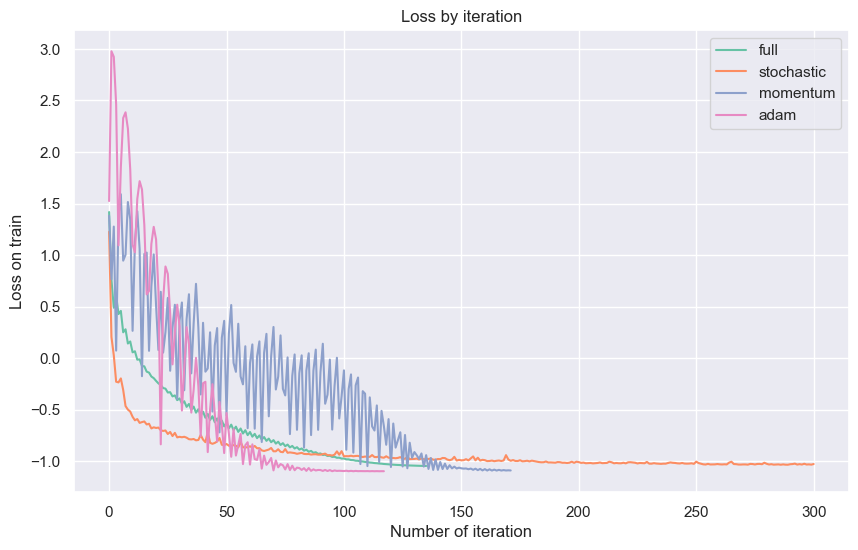

In [617]:
plt.figure(figsize=(10, 6))

for i in range(4):
  x = [i for i in range(data_log.iloc[i]['number_of_iterations'])]
  sns.lineplot(x = x, y = np.log(data_log.iloc[i]['history']), label=data_log.iloc[i]['method'], color=pal[i]) 

plt.xlabel('Number of iteration')
plt.ylabel('Loss on train')
plt.title('Loss by iteration')
plt.legend()
plt.grid(True)
plt.show()

Получается, MAE особенно хорошо работает для full и стохастического градиентного спуска, но для моментума, например, logcosh очевидно дает результат получше, на адаме похожим образом с logcosh получилось

Дальше не успела((